Enter start position (row col):  0 1
Enter goal position (row col):  4 4



Shortest Path Found: [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 4)]


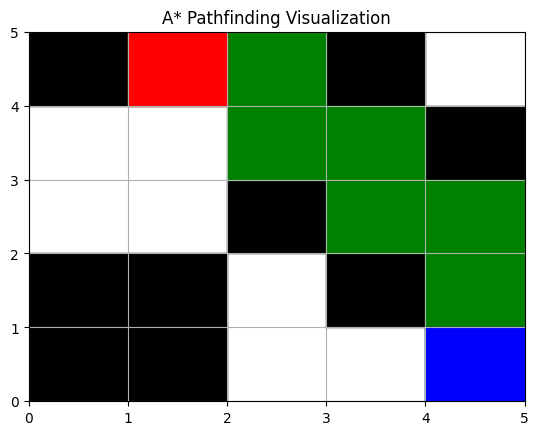

In [1]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

class Node:
    def __init__(self, position, parent=None, g=0, h=0):
        self.position = position
        self.parent = parent
        self.g = g  # Cost from start to current node
        self.h = h  # Estimated cost to goal
        self.f = g + h  # Total cost

    def __lt__(self, other):
        return self.f < other.f  # Needed for priority queue

def heuristic(a, b):
    """Calculate Manhattan distance"""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(grid, start, goal):
    open_list = []
    closed_set = set()
    start_node = Node(start, None, 0, heuristic(start, goal))
    heapq.heappush(open_list, start_node)
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up

    while open_list:
        current_node = heapq.heappop(open_list)

        if current_node.position == goal:
            path = []
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1]  # Return reversed path

        closed_set.add(current_node.position)

        for dx, dy in directions:
            neighbor_pos = (current_node.position[0] + dx, current_node.position[1] + dy)

            if (neighbor_pos[0] < 0 or neighbor_pos[0] >= len(grid) or 
                neighbor_pos[1] < 0 or neighbor_pos[1] >= len(grid[0]) or 
                grid[neighbor_pos[0]][neighbor_pos[1]] == 1 or 
                neighbor_pos in closed_set):
                continue  # Skip walls and visited nodes

            g_cost = current_node.g + 1
            h_cost = heuristic(neighbor_pos, goal)
            new_node = Node(neighbor_pos, current_node, g_cost, h_cost)

            heapq.heappush(open_list, new_node)

    return None  # No path found

def visualize_path(maze, path, start, goal):
    """Function to visualize the A* pathfinding result"""
    maze_array = np.array(maze)
    fig, ax = plt.subplots()
    ax.set_xticks(range(len(maze[0]) + 1))
    ax.set_yticks(range(len(maze) + 1))
    ax.grid(True)

    # Color walls as black
    for row in range(len(maze)):
        for col in range(len(maze[0])):
            if maze[row][col] == 1:
                ax.add_patch(plt.Rectangle((col, len(maze) - row - 1), 1, 1, color='black'))

    # Color the path in green
    if path:
        for row, col in path:
            ax.add_patch(plt.Rectangle((col, len(maze) - row - 1), 1, 1, color='green'))

    # Color start (red) and goal (blue)
    ax.add_patch(plt.Rectangle((start[1], len(maze) - start[0] - 1), 1, 1, color='red'))
    ax.add_patch(plt.Rectangle((goal[1], len(maze) - goal[0] - 1), 1, 1, color='blue'))

    plt.title("A* Pathfinding Visualization")
    plt.show()

# Define the maze (0 = open, 1 = obstacle)
maze = [
    [1, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],
    [0, 0, 1, 0, 0],
    [1, 1, 0, 1, 0],
    [1, 1, 0, 0, 0]
]

# Take input for start and goal positions
start_x, start_y = map(int, input("Enter start position (row col): ").split())
goal_x, goal_y = map(int, input("Enter goal position (row col): ").split())

start = (start_x, start_y)
goal = (goal_x, goal_y)

# Run A* algorithm
path = astar(maze, start, goal)

# Display results
if path:
    print("\nShortest Path Found:", path)
    visualize_path(maze, path, start, goal)
else:
    print("\nNo Path Found!")
